In [1]:
import numpy as np

# X 값 생성
X = np.linspace(0, 100, 200)  # 0부터 100까지 범위에서 100개의 점 생성

# Y 값 계산 (노이즈 추가)
Y_true = X + 1000  # 노이즈를 더하기 전의 Y 값

# 노이즈 추가
noise = np.random.normal(0, 10, 200)  # 평균이 0이고 표준 편차가 1인 정규 분포에서 랜덤한 값 생성
Y = Y_true + noise


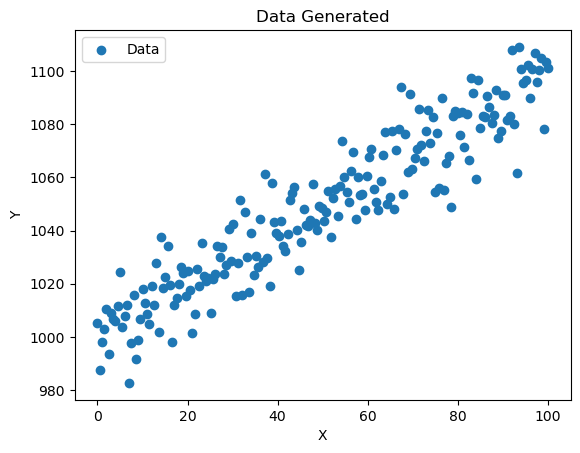

In [2]:
import matplotlib.pyplot as plt

# 데이터 시각화
plt.scatter(X, Y, label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Generated')
plt.legend()
plt.show()


데이터의 평균: 1049.1159484935945


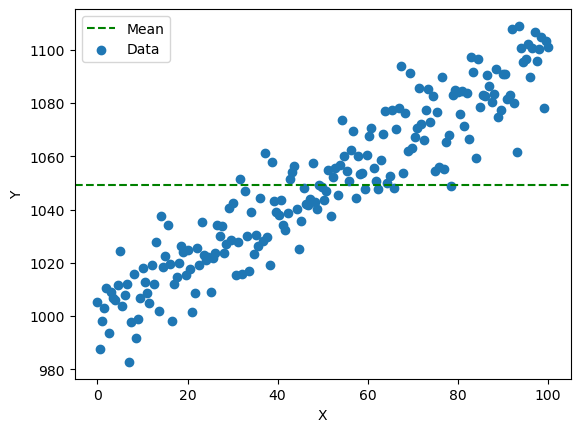

In [3]:
# 평균 계산
mean_Y = np.mean(Y)
print("데이터의 평균:", mean_Y)

# 평균 선 추가
plt.axhline(mean_Y, color='green', linestyle='--', label='Mean')
plt.scatter(X, Y, label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# 시각화
plt.show()

데이터의 특성을 표현하기에 너무 부적합함

## 지수가중이동평균
모든 데이터를 하나하나 추적하면 데이터의 과적합을 불러 일으킬 수 있으므로, 데이터의 일부분의 평균을 구해 그것을 데이터로 사용한다.

이 때 오래된 데이터에 가중치를 더 많이 부여해 그 영향을 줄인다.
$$
\hat{V}_{t-1} = \beta \times \hat{V}_{t-2} + (1-\beta) \times \Theta_{t-1}
$$$$$$​1ta \right)\ \times \Theta _{t-1}$ {V}t−1​ = β×Vt−2​ + (1−β) ×Θt−1​​

In [4]:
b = 0.9

data = {}
Y_data = []
for i in range(len(X)):
    data[X[i]] = Y[i]

for i in range(1,len(X)-1):
    Y_data.append((1-b) * Y[i-1] + b * Y[i])    

Ex=[]
num = round(1/(1-b))

for i in range(num-1, len(Y_data)-1):
    sum_Y = 0
    for j in range(i-num+1, i+1):
        sum_Y += Y_data[j]
    Ex.append(sum_Y / num)

print(len(Ex))

188


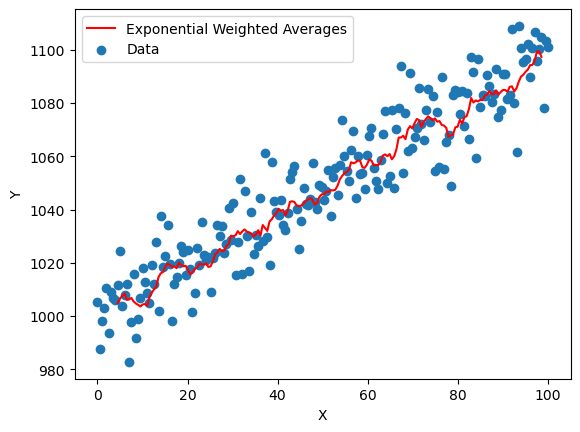

In [5]:
# Ex를 꺾은선 그래프로 시각화
plt.plot(X[num-1:-3], Ex, color='red', linestyle='-', label='Exponential Weighted Averages')


# 데이터 포인트 시각화
plt.scatter(X, Y, label='Data')

# 축 및 범례 설정
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# 그래프 출력
plt.show()


In [6]:
# 선형 함수 정의: y = wx + b
def linear_function(X, w, b):
    return np.dot(X, w) + b

# 손실 함수 정의 (평균 제곱 오차)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [10]:
import time

def gradient_descent(X, Y, learning_rate=0.01, epochs=1000):
    # 초기 가중치 및 편향 설정
    w = np.random.randn(X.shape[1], 1)  # 가중치
    b = np.random.randn()  # 편향
    
    # 손실 함수 저장
    costs = []
    
    # 경사 하강법 반복
    start_time = time.time()  # 시작 시간 측정
    for epoch in range(epochs):
        # 예측값 계산
        predictions = linear_function(X, w, b)

        # 손실 함수 값 계산 및 저장
        error = predictions - Y
        cost = mse_loss(Y, predictions)
        costs.append(cost)
        
        # 가중치와 편향 업데이트
        w_gradient = 2 * X.T.dot(error) / len(X)
        b_gradient = 2 * error.mean()
        w -= learning_rate * w_gradient
        b -= learning_rate * b_gradient
        
        # 매 100번째 epoch마다 손실 출력
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: MSE = {cost}")
            check_gradients(X, Y, w, b, epoch)
    
    end_time = time.time()  # 종료 시간 측정
    elapsed_time = end_time - start_time  # 경과 시간 계산
    
    return w, b, costs, elapsed_time

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# 선형 회귀 모델 초기화 및 학습
w, b, costs, elapsed_time= gradient_descent(X, Y)



IndexError: tuple index out of range

In [ ]:
import numpy as np
import time

# 선형 함수 정의: y = wx + b
def linear_function(X, w, b):
    return np.dot(X, w) + b

# 손실 함수 정의 (평균 제곱 오차)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_descent(X, Y, learning_rate=0.01, epochs=1000):
    # 초기 가중치 및 편향 설정
    w = np.random.randn(X.shape[1], 1)  # 가중치
    b = np.random.randn()  # 편향
    
    # 손실 함수 저장
    costs = []
    
    # 경사 하강법 반복
    start_time = time.time()  # 시작 시간 측정
    for epoch in range(epochs):
        # 예측값 계산
        predictions = linear_function(X, w, b)

        # 손실 함수 값 계산 및 저장
        error = predictions - Y
        cost = mse_loss(Y, predictions)
        costs.append(cost)
        
        # 가중치와 편향 업데이트
        w_gradient = 2 * np.dot(X.T, error) / len(X)
        b_gradient = 2 * error.mean()
        w -= learning_rate * w_gradient
        b -= learning_rate * b_gradient
        
        # 매 100번째 epoch마다 손실 출력
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: MSE = {cost}")
            check_gradients(X, Y, w, b, epoch)
    
    end_time = time.time()  # 종료 시간 측정
    elapsed_time = end_time - start_time  # 경과 시간 계산
    
    return w, b, costs, elapsed_time

def check_gradients(X, y, w, b, epoch):
    # 가중치에 대한 기울기 계산
    grad_w = np.zeros_like(w)
    for i in range(w.shape[0]):
        w_plus = w.copy()
        w_minus = w.copy()
        w_plus[i] += 1e-5
        w_minus[i] -= 1e-5
        grad_w[i] = (mse_loss(y, linear_function(X, w_plus, b)) - mse_loss(y, linear_function(X, w_minus, b))) / (2 * 1e-5)

    # 편향에 대한 기울기 계산
    grad_b = np.zeros_like(b)
    grad_b = (mse_loss(y, linear_function(X, w, b + 1e-5)) - mse_loss(y, linear_function(X, w, b - 1e-5))) / (2 * 1e-5)

    print(f"Epoch {epoch}: Gradient check - weights: {grad_w}, bias: {grad_b}")

# 데이터 생성
X = np.random.rand(200, 1)
Y = 2 * X + 1 + np.random.randn(200, 1) * 0.1  # y = 2x + 1 + noise

# 경사 하강법 수행
w, b, costs, elapsed_time = gradient_descent(X, Y)
